In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

In [10]:
df = pd.read_csv('./data/matches.csv')
df

,match_id,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...,...
44159,44160,2022-11-21,Senegal,Netherlands,0.0,2.0,FIFA World Cup,Doha,Qatar,True
44160,44161,2022-11-21,England,Iran,6.0,2.0,FIFA World Cup,Al Rayyan,Qatar,True
44161,44162,2022-11-21,United States,Wales,1.0,1.0,FIFA World Cup,Al Rayyan,Qatar,True
44162,44163,2022-11-22,Argentina,Saudi Arabia,1.0,2.0,FIFA World Cup,Lusail,Qatar,True


In [9]:
df.info(verbose=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44164 entries, 0 to 44163
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   match_id    44164 non-null  int64  
 1   date        44164 non-null  object 
 2   home_team   44164 non-null  object 
 3   away_team   44164 non-null  object 
 4   home_score  44164 non-null  float64
 5   away_score  44164 non-null  float64
 6   tournament  44164 non-null  object 
 7   city        44164 non-null  object 
 8   country     44164 non-null  object 
 9   neutral     44164 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 3.1+ MB


,match_id,home_score,away_score
count,44164.000000,44164.000000,44164.000000
mean,22082.500023,1.739494,1.178109
std,12749.193020,1.746572,1.394421
min,1.000000,0.000000,0.000000
25%,11041.750000,1.000000,0.000000
50%,22082.500000,1.000000,1.000000
75%,33123.250000,2.000000,2.000000
max,44165.000000,31.000000,21.000000


## Bar Plots of Categoricals

<AxesSubplot: >

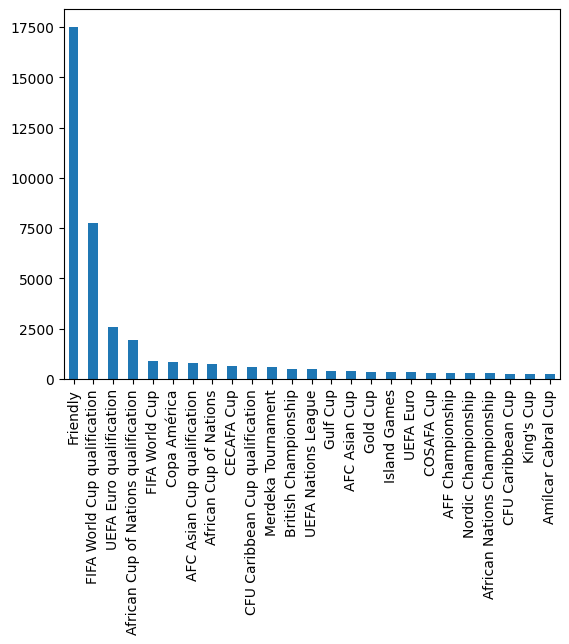

In [3]:
# tournaments with most matches (over 100) - top 25
df['tournament'].value_counts().head(25).plot(kind='bar')

<AxesSubplot: >

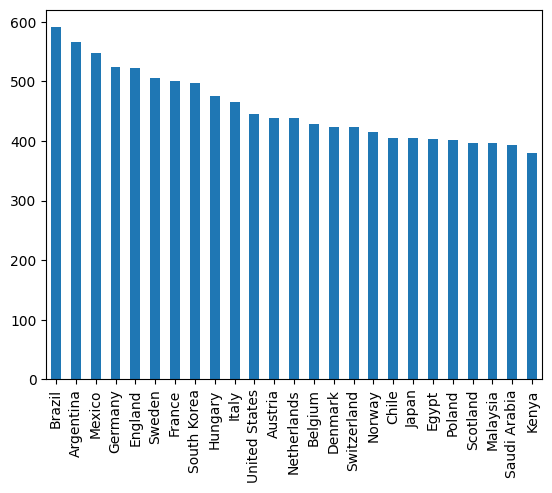

In [4]:
df['home_team'].value_counts().head(25).plot(kind='bar')

<AxesSubplot: >

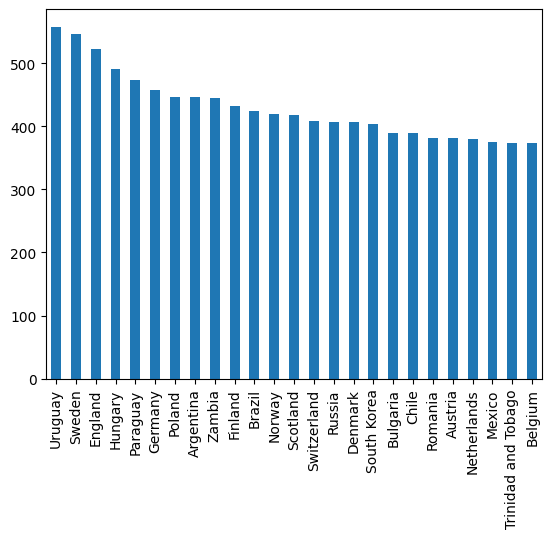

In [5]:
df['away_team'].value_counts().head(25).plot(kind='bar')

In [6]:
len(df['home_team'].unique())

311

In [11]:
df2 = pd.read_csv('./data/confederations.csv')
df2.info(verbose=True)
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code                       222 non-null    object 
 1   name                       222 non-null    object 
 2   founded                    222 non-null    int64  
 3   FIFA_affiliation           211 non-null    float64
 4   confederation_affiliation  222 non-null    int64  
 5   regional                   143 non-null    object 
 6   confederation              222 non-null    object 
 7   IOC_member                 222 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 12.5+ KB


,code,name,founded,FIFA_affiliation,confederation_affiliation,regional,confederation,IOC_member
0,AUS,Australia,1961,1963.0,2006,AFF,AFC,True
1,BRU,Brunei Darussalam,1952,1972.0,1969,AFF,AFC,True
2,CAM,Cambodia,1933,1954.0,1954,AFF,AFC,True
3,LAO,Laos,1951,1952.0,1968,AFF,AFC,True
4,INA,Indonesia,1930,1952.0,1954,AFF,AFC,True


In [12]:
len(df2['name'].unique())

222

In [8]:
df2.country = df2.country.str.title()

In [9]:
len(df2['country'].unique())

191

In [14]:
df2['name'].unique

<bound method Series.unique of 0              Australia
1      Brunei Darussalam
2               Cambodia
3                   Laos
4              Indonesia
             ...        
217               Sweden
218          Switzerland
219               Turkey
220              Ukraine
221                Wales
Name: name, Length: 222, dtype: object>

In [27]:
df = df[df['date'] > '1950-01-01']

In [30]:
countries_not_part_of_fifa = []
countries_not_part_of_fifa = list(set(df['home_team'].unique()) - set(df2['name'].unique()))
countries_not_part_of_fifa

['Kernow',
 'Padania',
 'Vatican City',
 'Brittany',
 'Gozo',
 'Yorkshire',
 'Tibet',
 'Rhodes',
 'Galicia',
 'Madrid',
 'Basque Country',
 'Yoruba Nation',
 'Palau',
 'Panjab',
 'São Tomé and Príncipe',
 'Mayotte',
 'United States Virgin Islands',
 'Barawa',
 'Saarland',
 'Western Armenia',
 'Western Isles',
 'Iraqi Kurdistan',
 'Western Sahara',
 'Vietnam Republic',
 'Isle of Wight',
 'Saare County',
 'Corsica',
 'Yemen DPR',
 'Gotland',
 'Saint Pierre and Miquelon',
 'Provence',
 'Chameria',
 'Catalonia',
 'Andalusia',
 'Abkhazia',
 'Ellan Vannin',
 'Kyrgyzstan',
 'Székely Land',
 'Occitania',
 'Tamil Eelam',
 'Republic of St. Pauli',
 'Mapuche',
 'Sark',
 'Biafra',
 'Frøya',
 'Taiwan',
 'Arameans Suryoye',
 'Ynys Môn',
 'Felvidék',
 'Niue',
 'North Korea',
 'Sápmi',
 'Isle of Man',
 'Orkney',
 'Găgăuzia',
 'Monaco',
 'South Korea',
 'Canary Islands',
 'Cascadia',
 'Northern Cyprus',
 'Parishes of Jersey',
 'Guernsey',
 'Silesia',
 'Wallis Islands and Futuna',
 'Alderney',
 'Matabel

In [40]:
len(countries_not_part_of_fifa)

95

In [41]:

countries_fifa_not_in_matches = list(set(df2['name'].unique()) - set(df['home_team'].unique()))
countries_fifa_not_in_matches

['DPR Korea',
 'Sao Tome and Principe',
 'Korea Republic',
 'China',
 'Reunion',
 'Chinese Taipei',
 'Kyrgyz Republic',
 'U.S. Virgin Islands']

95

In [32]:
countries_list_matches = df['home_team'].value_counts()
countries_list_matches

Mexico                       527
Brazil                       524
South Korea                  497
United States                436
Germany                      431
                            ... 
Chameria                       1
Saint Helena                   1
Madrid                         1
Saint Pierre and Miquelon      1
Aymara                         1
Name: home_team, Length: 309, dtype: int64

In [33]:
countries = []
for value in countries_list_matches.index:
    countries.append(value)
countries

['Mexico',
 'Brazil',
 'South Korea',
 'United States',
 'Germany',
 'Argentina',
 'England',
 'France',
 'Egypt',
 'Malaysia',
 'Japan',
 'Saudi Arabia',
 'Italy',
 'Sweden',
 'Kenya',
 'Netherlands',
 'Chile',
 'Poland',
 'Malawi',
 'Denmark',
 'Kuwait',
 'Spain',
 'Indonesia',
 'Thailand',
 'Hungary',
 'Qatar',
 'China PR',
 'Austria',
 'Norway',
 'Belgium',
 'Tunisia',
 'Zambia',
 'Switzerland',
 'United Arab Emirates',
 'Bahrain',
 'Morocco',
 'Costa Rica',
 'Portugal',
 'Algeria',
 'Russia',
 'Republic of Ireland',
 'Singapore',
 'Ghana',
 'Scotland',
 'Trinidad and Tobago',
 'Romania',
 'Iran',
 'Iraq',
 'Uganda',
 'Nigeria',
 'El Salvador',
 'Ivory Coast',
 'Honduras',
 'Greece',
 'Jamaica',
 'Australia',
 'Tanzania',
 'Oman',
 'Cameroon',
 'Peru',
 'Turkey',
 'Uruguay',
 'Finland',
 'Bulgaria',
 'Colombia',
 'Israel',
 'Senegal',
 'Wales',
 'South Africa',
 'India',
 'Paraguay',
 'Guatemala',
 'Northern Ireland',
 'Malta',
 'Hong Kong',
 'Mali',
 'Ethiopia',
 'Ecuador',
 'Myan

In [39]:
print((countries_list_matches.loc[countries_not_part_of_fifa]).sort_values(ascending=False).head(20))

South Korea                     497
China PR                        334
Czechoslovakia                  157
Yugoslavia                      140
German DR                       132
North Korea                     126
Kyrgyzstan                       66
Vietnam Republic                 49
Jersey                           48
Réunion                          39
Guernsey                         37
Taiwan                           34
Greenland                        30
Ynys Môn                         29
Basque Country                   29
Padania                          28
Brunei                           28
Åland Islands                    27
United States Virgin Islands     26
Isle of Wight                    26
Name: home_team, dtype: int64


In [ ]:
# Can Manually Change:
# Korea Republic -> South Korea